In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from fct import *
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)  # Affiche toutes les lignes
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
import seaborn as sns


In [3]:
df = pd.read_csv("data/df.csv", sep=",")
df_temporel = pd.read_csv("data/df_temporel.csv", sep=",")
df_encoded = pd.read_csv("data/df_encoded.csv", sep=",")

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,5.837730,0,7,0.693147,0,0,2,0.0,0,BB,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.000000,0,0
1,Resort Hotel,0,2.079442,0,7,0.693147,0,1,1,0.0,0,BB,Direct,0,0,0,A,C,0,No Deposit,0,Transient,4.330733,0,0
2,Resort Hotel,0,2.639057,0,7,0.693147,0,1,1,0.0,0,BB,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,4.330733,0,0
3,Resort Hotel,0,2.708050,0,7,0.693147,0,2,2,0.0,0,BB,Online TA,0,0,0,A,A,0,No Deposit,0,Transient,4.595120,0,1
4,Resort Hotel,0,0.000000,0,7,0.693147,0,2,2,0.0,0,BB,Direct,0,0,0,C,C,0,No Deposit,0,Transient,4.682131,0,0


In [4]:
df_temporel['arrival_date'] = pd.to_datetime(df_temporel['arrival_date'])
df_temporel['arrival_day_of_week'] = df_temporel['arrival_date'].dt.day_name()

In [5]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

contingency_table = df_temporel['is_canceled'].groupby(df_temporel['arrival_day_of_week']).value_counts().unstack()
cramer_v = cramers_v(contingency_table.values)
cramer_v

0.050978410920892434

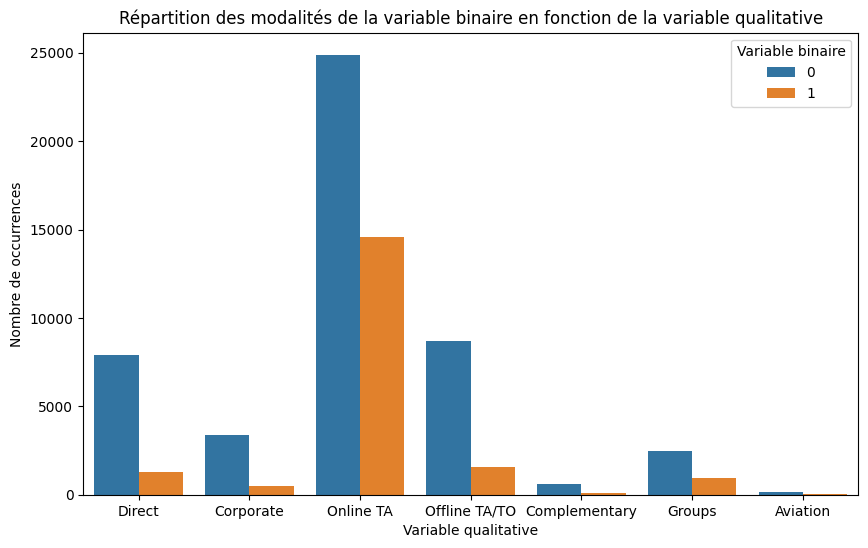

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['market_segment'], hue=df['is_canceled'], data=df)
plt.title('Répartition des modalités de la variable binaire en fonction de la variable qualitative')
plt.xlabel('Variable qualitative')
plt.ylabel('Nombre de occurrences')
plt.legend(title='Variable binaire')
plt.show()


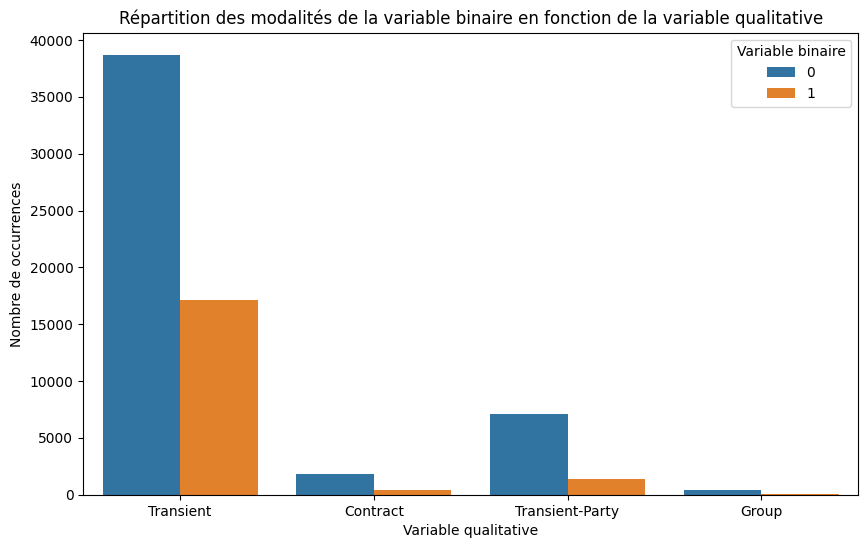

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['customer_type'], hue=df['is_canceled'], data=df)
plt.title('Répartition des modalités de la variable binaire en fonction de la variable qualitative')
plt.xlabel('Variable qualitative')
plt.ylabel('Nombre de occurrences')
plt.legend(title='Variable binaire')
plt.show()
